# Question: How does the urbanisation impact the crime level in an area?

In [115]:
import requests
import pandas as pd
import itertools


In [116]:
from es_ds_loader import *

In [117]:
loader = EurostatDataLoader(cache_expiry=1800)
df = loader.load_dataset('ilc_mddw06')

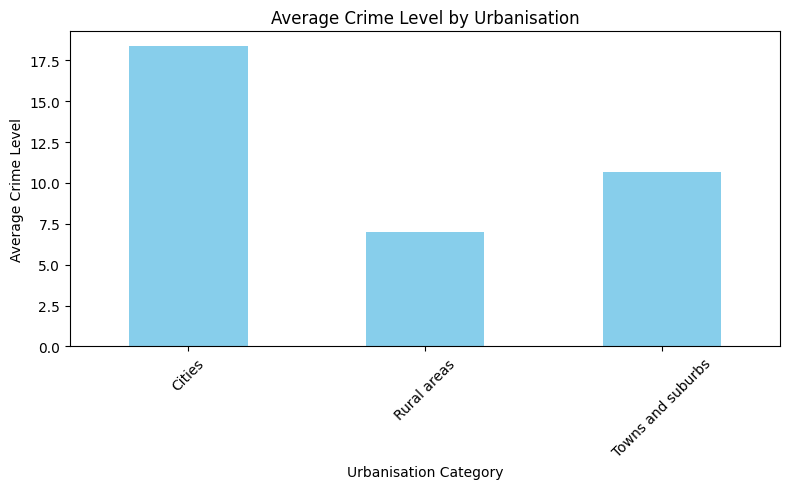

In [ ]:
avg_crime_by_urbanisation = df.groupby('deg_urb')['value'].mean().dropna()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
avg_crime_by_urbanisation.plot(kind='bar', color='skyblue')
plt.title("Average Crime Level by Urbanisation")
plt.xlabel("Urbanisation Category")
plt.ylabel("Average Crime Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

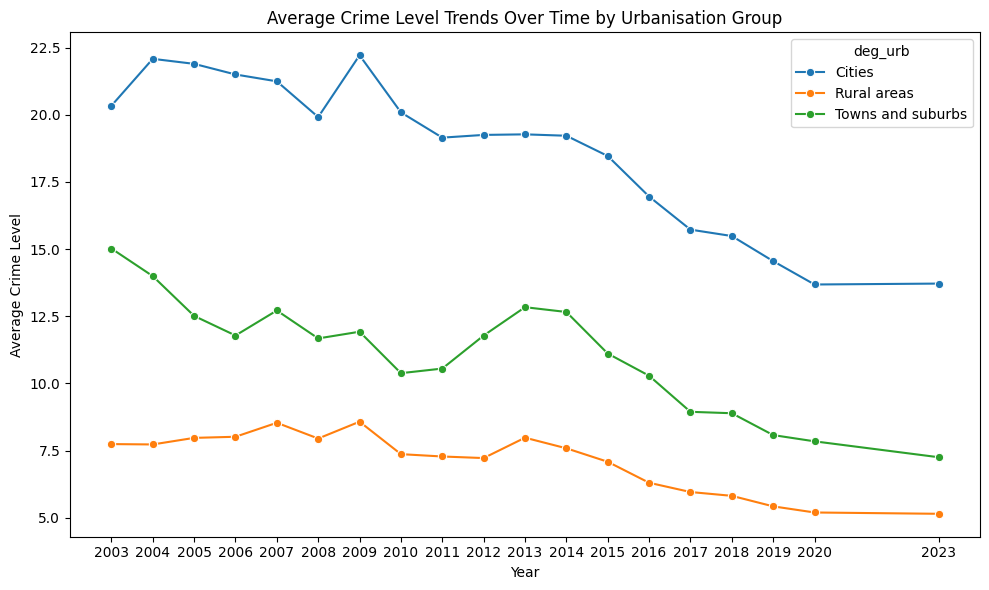

In [119]:
df_filtered = df.dropna(subset=['value'])

avg_crime_over_time = df_filtered.groupby(['deg_urb', 'time'])['value'].mean().reset_index()

avg_crime_over_time['time'] = avg_crime_over_time['time'].astype(int)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_crime_over_time, x='time', y='value', hue='deg_urb', marker='o')
plt.title("Average Crime Level Trends Over Time by Urbanisation Group")
plt.xlabel("Year")
plt.ylabel("Average Crime Level")
plt.xticks(sorted(avg_crime_over_time['time'].unique()))
plt.tight_layout()
plt.show()


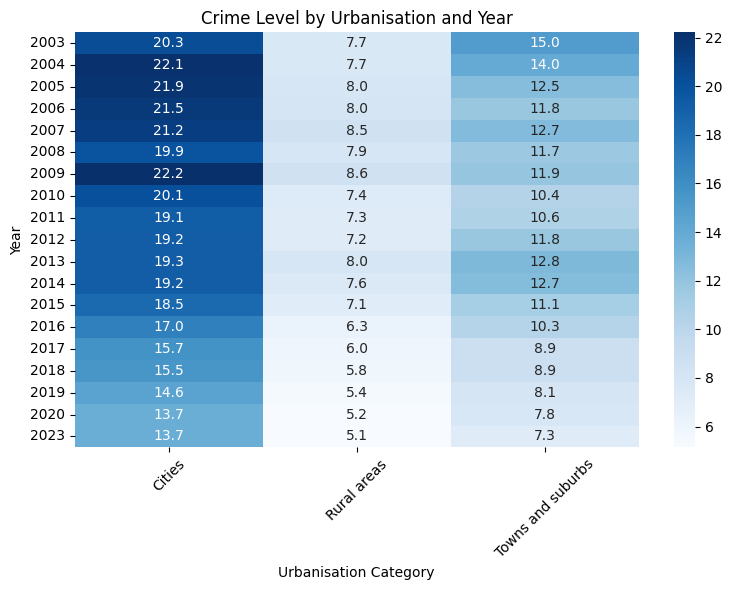

In [120]:
df_pivot_urban = df_filtered.pivot_table(index='time', columns='deg_urb', values='value', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot_urban, cmap='Blues', annot=True, fmt=".1f")
plt.title("Crime Level by Urbanisation and Year")
plt.ylabel("Year")
plt.xlabel("Urbanisation Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

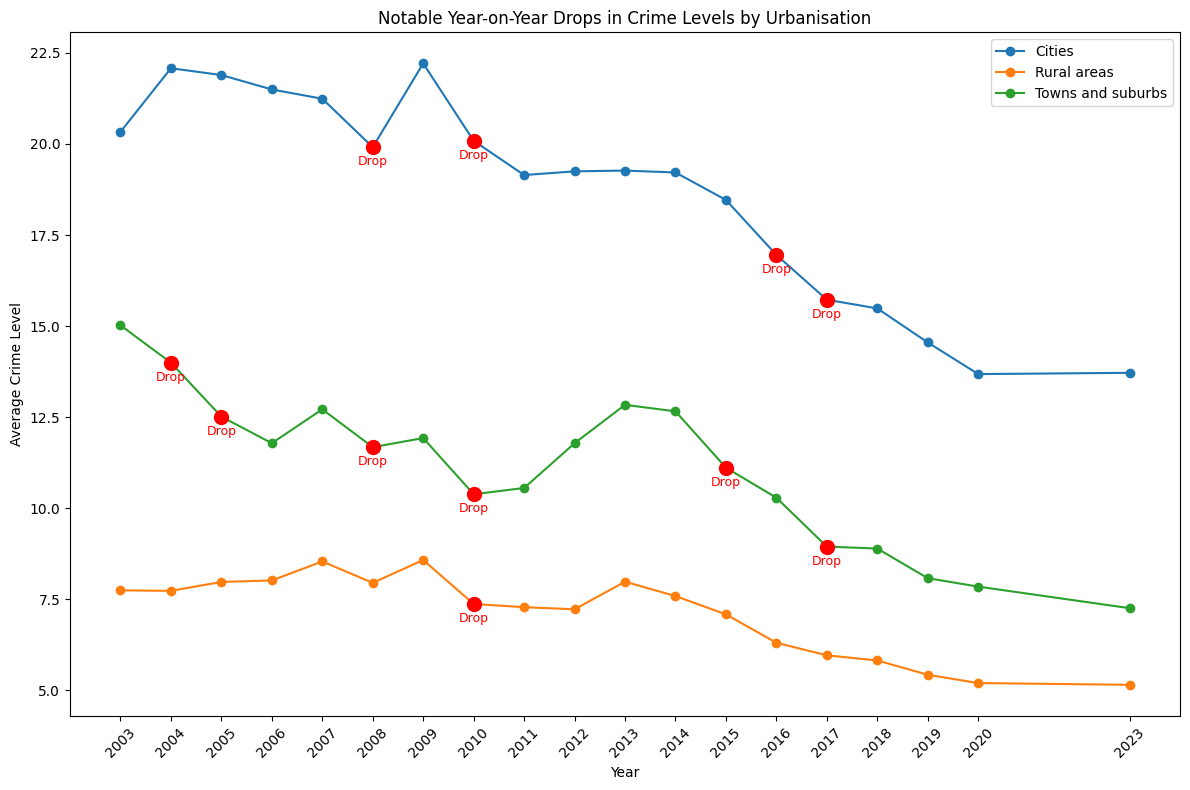

In [121]:

plt.figure(figsize=(12, 8))

for category in avg_crime_over_time['deg_urb'].unique():
    sub_df = avg_crime_over_time[avg_crime_over_time['deg_urb'] == category].sort_values('time')
    
    plt.plot(sub_df['time'], sub_df['value'], marker='o', label=category)
    
    sub_df['diff'] = sub_df['value'].diff()
    
    significant_drops = sub_df[sub_df['diff'] < -1.0]
    
    plt.scatter(significant_drops['time'], significant_drops['value'], color='red', s=100, zorder=5)
    for _, row in significant_drops.iterrows():
        plt.text(row['time'], row['value'] - 0.5, "Drop", fontsize=9, color='red', ha='center')

plt.title("Notable Year-on-Year Drops in Crime Levels by Urbanisation")
plt.xlabel("Year")
plt.ylabel("Average Crime Level")
plt.legend()
plt.xticks(sub_df['time'].unique(), rotation=45)
plt.tight_layout()
plt.show()

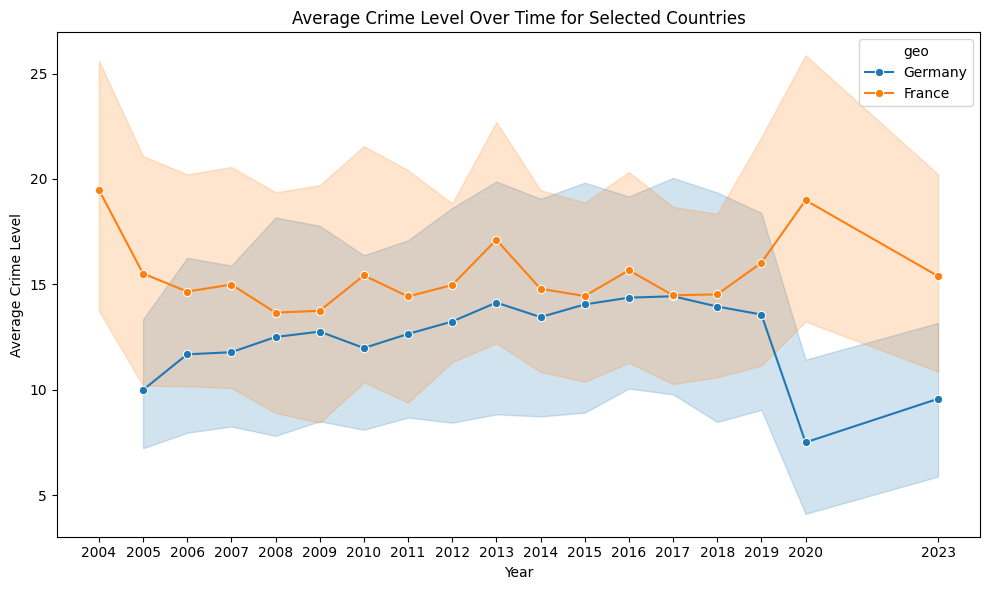

In [122]:
# Define a list of countries to display (adjust this list as needed)
selected_countries = ['Germany', 'France']

# Filter the data for the selected countries
df_country = df_filtered[df_filtered['geo'].isin(selected_countries)].copy()

# Convert the 'time' column to integer if needed
df_country['time'] = df_country['time'].astype(int)

# Create the dynamic line plot using seaborn (modules already imported)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_country, x='time', y='value', hue='geo', marker='o')
plt.title("Average Crime Level Over Time for Selected Countries")
plt.xlabel("Year")
plt.ylabel("Average Crime Level")
plt.xticks(sorted(df_country['time'].unique()))
plt.tight_layout()
plt.show()